## Metadata

DS6050 Final Project

Instructor: Dr. Sheng Li

MSDS 2023

Group Members: Gargee Jagtap, Ali Rivera, Anne Louise Seekford


**CNN to classify upper extremity X-Rays as normal/abnormal. Data retrieved with permission from Stanford ML Group 3/13/23.**

In [1]:
pwd

'/gpfs/gpfs0/scratch/wat6sv/DL_Final'

In [2]:
# Mount drive
# from google.colab import drive
# drive.mount('/content/drive/',  force_remount=True)

In [3]:
# Check drive contents (filenames)
# !ls '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1'
#!cd MURA-v1.1

In [4]:
import shutil
import glob
import os
import fnmatch
import pandas as pd
import numpy as np

In [5]:
# Change directory to access shared drive files

os.chdir('MURA-v1.1')
#%cd /content/drive/Shareddrives/DL_FinalProject/MURA-v1.1

# Read in Data

In [6]:
# mypath = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train'
mypath = '/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/train'
mypath

'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/train'

In [7]:
def unzipping(path, bodypart):
    
    files = os.listdir(f"{path}/{bodypart}/")
    destination0 = f"{path}/{bodypart}/"

    for patientID in files:
        studylist = os.listdir(os.path.join(destination0,patientID))

        for study in studylist:
            source = f"{path}/{bodypart}/{patientID}/"
            imagelist = os.listdir(os.path.join(source, study))

            for image in imagelist:
                source = f"{path}/{bodypart}/{patientID}/{study}/{image}"
                new_destination = f"{path}/{bodypart}/{patientID}_{study}_{image}"
                file = os.rename(source,new_destination)

In [8]:
# DONE - DO NOT RUN AGAIN

# unzipping(mypath, 'XR_ELBOW')
# unzipping(mypath, 'XR_FINGER')
# unzipping(mypath, 'XR_FOREARM')
# unzipping(mypath, 'XR_HAND')
# unzipping(mypath, 'XR_HUMERUS')
# unzipping(mypath, 'XR_SHOULDER')
# unzipping(mypath, 'XR_WRIST')

In [9]:
# define path to validation folder
# valpath = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/valid'
valpath = '/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/valid'
valpath

'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/valid'

In [10]:
# DONE - DO NOT RUN AGAIN

# unzipping(valpath, 'XR_ELBOW')
# #unzipping(valpath, 'XR_FINGER')
# #unzipping(valpath, 'XR_FOREARM')
# #unzipping(valpath, 'XR_HAND')
# #unzipping(valpath, 'XR_HUMERUS')
# unzipping(valpath, 'XR_SHOULDER')
# unzipping(valpath, 'XR_WRIST')

In [11]:
cd MURA-v1.1

[Errno 2] No such file or directory: 'MURA-v1.1'
/gpfs/gpfs0/scratch/wat6sv/DL_Final


In [12]:
# Get list of file paths
train_paths = os.listdir('train')
valid_paths = os.listdir('valid')
test_paths = os.listdir('test')

In [13]:
# 'train' paths
train_paths_hand = os.listdir('train/XR_HAND')
train_paths_humerus = os.listdir('train/XR_HUMERUS')
train_paths_finger = os.listdir('train/XR_FINGER')
train_paths_elbow = os.listdir('train/XR_ELBOW')
train_paths_shoulder = os.listdir('train/XR_SHOULDER')
train_paths_wrist = os.listdir('train/XR_WRIST')
train_paths_forearm = os.listdir('train/XR_FOREARM')

# 'valid' paths
valid_paths_hand = os.listdir('valid/XR_HAND')
valid_paths_humerus = os.listdir('valid/XR_HUMERUS')
valid_paths_finger = os.listdir('valid/XR_FINGER')
valid_paths_elbow = os.listdir('valid/XR_ELBOW')
valid_paths_shoulder = os.listdir('valid/XR_SHOULDER')
valid_paths_wrist = os.listdir('valid/XR_WRIST')
valid_paths_forearm = os.listdir('valid/XR_FOREARM')

# 'test' paths
test_paths_hand = os.listdir('test/XR_HAND')
test_paths_humerus = os.listdir('test/XR_HUMERUS')
test_paths_finger = os.listdir('test/XR_FINGER')
test_paths_elbow = os.listdir('test/XR_ELBOW')
test_paths_shoulder = os.listdir('test/XR_SHOULDER')
test_paths_wrist = os.listdir('test/XR_WRIST')
test_paths_forearm = os.listdir('test/XR_FOREARM')

## Get binary classification labels

In [14]:
# Loop through files and get label

def create_labels(file_path_list):
    positive = 'positive'
    negative = 'negative'
    labels = []
    for file in file_path_list:
        if positive in file:
            labels.append(1)
        elif negative in file:
            labels.append(0)
        else:
            labels.append(np.nan)
    return labels

In [15]:
# 'train' labels
train_label_hand = create_labels(train_paths_hand)
train_label_humerus = create_labels(train_paths_humerus)
train_label_finger = create_labels(train_paths_finger)
train_label_elbow = create_labels(train_paths_elbow)
train_label_shoulder = create_labels(train_paths_shoulder)
train_label_wrist = create_labels(train_paths_wrist)
train_label_forearm = create_labels(train_paths_forearm)

# 'valid' labels
valid_label_hand = create_labels(valid_paths_hand)
valid_label_humerus = create_labels(valid_paths_humerus)
valid_label_finger = create_labels(valid_paths_finger)
valid_label_elbow = create_labels(valid_paths_elbow)
valid_label_shoulder = create_labels(valid_paths_shoulder)
valid_label_wrist = create_labels(valid_paths_wrist)
valid_label_forearm = create_labels(valid_paths_forearm)

# 'test' labels
test_label_hand = create_labels(test_paths_hand)
test_label_humerus = create_labels(test_paths_humerus)
test_label_finger = create_labels(test_paths_finger)
test_label_elbow = create_labels(test_paths_elbow)
test_label_shoulder = create_labels(test_paths_shoulder)
test_label_wrist = create_labels(test_paths_wrist)
test_label_forearm = create_labels(test_paths_forearm)

In [16]:
# Path label dataframes

# 'train'
train_hand_df = pd.DataFrame({'path': train_paths_hand, 'label': train_label_hand})
train_humerus_df = pd.DataFrame({'path': train_paths_humerus, 'label': train_label_humerus})
train_finger_df = pd.DataFrame({'path': train_paths_finger, 'label': train_label_finger})
train_elbow_df = pd.DataFrame({'path': train_paths_elbow, 'label': train_label_elbow})
train_shoulder_df = pd.DataFrame({'path': train_paths_shoulder, 'label': train_label_shoulder})
train_wrist_df = pd.DataFrame({'path': train_paths_wrist, 'label': train_label_wrist})
train_forearm_df = pd.DataFrame({'path': train_paths_forearm, 'label': train_label_forearm})

# 'valid'
valid_hand_df = pd.DataFrame({'path': valid_paths_hand, 'label': valid_label_hand})
valid_humerus_df = pd.DataFrame({'path': valid_paths_humerus, 'label': valid_label_humerus})
valid_finger_df = pd.DataFrame({'path': valid_paths_finger, 'label': valid_label_finger})
valid_elbow_df = pd.DataFrame({'path': valid_paths_elbow, 'label': valid_label_elbow})
valid_shoulder_df = pd.DataFrame({'path': valid_paths_shoulder, 'label': valid_label_shoulder})
valid_wrist_df = pd.DataFrame({'path': valid_paths_wrist, 'label': valid_label_wrist})
valid_forearm_df = pd.DataFrame({'path': valid_paths_forearm, 'label': valid_label_forearm})

# 'test'
test_hand_df = pd.DataFrame({'path': test_paths_hand, 'label': test_label_hand})
test_humerus_df = pd.DataFrame({'path': test_paths_humerus, 'label': test_label_humerus})
test_finger_df = pd.DataFrame({'path': test_paths_finger, 'label': test_label_finger})
test_elbow_df = pd.DataFrame({'path': test_paths_elbow, 'label': test_label_elbow})
test_shoulder_df = pd.DataFrame({'path': test_paths_shoulder, 'label': test_label_shoulder})
test_wrist_df = pd.DataFrame({'path': test_paths_wrist, 'label': test_label_wrist})
test_forearm_df = pd.DataFrame({'path': test_paths_forearm, 'label': test_label_forearm})

In [17]:
# Remove folders in dataframes (so its just images)

def rmv_folders(df):
    path = df.path
    folders = []
    for file in path:
        if '.png' not in file:
            folders.append(file)
        else:
            pass   

    df = df.dropna()
    return df

In [18]:
# 'train' dataframes WITHOUT folders
train_hand_df = rmv_folders(train_hand_df)
train_humerus_df = rmv_folders(train_humerus_df)
train_finger_df = rmv_folders(train_finger_df)
train_elbow_df = rmv_folders(train_elbow_df)
train_shoulder_df = rmv_folders(train_shoulder_df)
train_wrist_df = rmv_folders(train_wrist_df)
train_forearm_df = rmv_folders(train_forearm_df)

# 'valid' dataframes WITHOUT folders
valid_hand_df = rmv_folders(valid_hand_df)
valid_humerus_df = rmv_folders(valid_humerus_df)
valid_finger_df = rmv_folders(valid_finger_df)
valid_elbow_df = rmv_folders(valid_elbow_df)
valid_shoulder_df = rmv_folders(valid_shoulder_df)
valid_wrist_df = rmv_folders(valid_wrist_df)
valid_forearm_df = rmv_folders(valid_forearm_df)

## Add body part labels to dataframe

In [19]:

def add_body_part(df, part):
  df['body_part'] = part

# 'train'
add_body_part(train_hand_df, "hand")
add_body_part(train_humerus_df, "humerus")
add_body_part(train_finger_df, "finger")
add_body_part(train_elbow_df, "elbow")
add_body_part(train_shoulder_df, "shoulder")
add_body_part(train_wrist_df, "wrist")
add_body_part(train_forearm_df, "forearm")

# 'valid'
add_body_part(valid_hand_df, "hand")
add_body_part(valid_humerus_df, "humerus")
add_body_part(valid_finger_df, "finger")
add_body_part(valid_elbow_df, "elbow")
add_body_part(valid_shoulder_df, "shoulder")
add_body_part(valid_wrist_df, "wrist")
add_body_part(valid_forearm_df, "forearm")

# 'test'
add_body_part(test_hand_df, "hand")
add_body_part(test_humerus_df, "humerus")
add_body_part(test_finger_df, "finger")
add_body_part(test_elbow_df, "elbow")
add_body_part(test_shoulder_df, "shoulder")
add_body_part(test_wrist_df, "wrist")
add_body_part(test_forearm_df, "forearm")



## Create final train & validation dataframes

In [20]:
# Combine all dataframes into one

# 'train'
dataset_all = pd.concat([train_hand_df, 
                           train_humerus_df, 
                           train_finger_df, 
                           train_elbow_df, 
                           train_shoulder_df, 
                           train_wrist_df,
                           train_forearm_df], axis=0)

# 'valid'
dataset_valid = pd.concat([valid_hand_df,
                         valid_humerus_df, 
                         valid_finger_df, 
                         valid_elbow_df, 
                         valid_shoulder_df,
                         valid_wrist_df,
                         valid_forearm_df], axis=0)

# 'test'
dataframe_test = pd.concat([test_elbow_df,
                            test_finger_df,
                            test_forearm_df,
                            test_hand_df,
                            test_humerus_df, 
                            test_shoulder_df,
                            test_wrist_df], axis=0)

In [21]:
# Delete empty train directories in the Drive - only needs to be ran once


# # ELBOW
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_ELBOW')
# elbow_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_ELBOW/'
# for patient in range(len(elbow_patients)):
#   path = os.path.join(folder, elbow_patients[patient])
#   shutil.rmtree(path)

# # FINGER
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_FINGER')
# finger_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_FINGER/'
# for patient in range(len(finger_patients)):
#   path = os.path.join(folder, finger_patients[patient])
#   shutil.rmtree(path)

# # FOREARM
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_FOREARM')
# forearm_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_FOREARM/'
# for patient in range(len(forearm_patients)):
#   path = os.path.join(folder, forearm_patients[patient])
#   shutil.rmtree(path)

# # HAND 
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_HAND')
# hand_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_HAND/'
# for patient in range(len(hand_patients)):
#   path = os.path.join(folder, hand_patients[patient])
#   shutil.rmtree(path)

# # HUMERUS
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_HUMERUS')
# hum_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_HUMERUS/'
# for patient in range(len(hum_patients)):
#   path = os.path.join(folder, hum_patients[patient])
#   shutil.rmtree(path)

# # SHOULDER
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_SHOULDER')
# shoulder_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_SHOULDER/'
# for patient in range(len(shoulder_patients)):
#   path = os.path.join(folder, shoulder_patients[patient])
#   shutil.rmtree(path)

# # WRIST
# os.chdir('/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_WRIST')
# wrist_patients = next(os.walk('.'))[1]
# folder = '/content/drive/Shareddrives/DL_FinalProject/MURA-v1.1/train/XR_WRIST/'
# for patient in range(len(wrist_patients)):
#   path = os.path.join(folder, wrist_patients[patient])
#   shutil.rmtree(path)

# MODEL LAYOUT:
1.   Image goes into `part_model`

  a. Gets predicted label for body part

2.   Item goes into appropriate model from `model_dict` for predicition

  a. Gets predicted label for normal/abnormal




### Test Split

In [22]:
## make test folder of images - only need to run once!

# from sklearn.model_selection import train_test_split

# SEED = 2023
# train, test = train_test_split(dataset_all, test_size=0.2, random_state=SEED)

# test_list = test.path.tolist()
# folders = os.listdir()

# for folder in folders:
#     for root, dirs, files in os.walk(f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/train/{folder}'):
#         for file in files:
#             if file in test_list:
#                 temp = shutil.move(f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/train/{folder}/'+file, 
#                                    f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1/test/{folder}')

In [23]:
from torch.utils.data import DataLoader, random_split
from torch import Generator
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torchvision import transforms

data_dir = '/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1'

TEST_RATIO = 0.2
BATCH_SIZE = 32

dataset_train = ImageFolder(
    data_dir + '/train',
    transform= transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
        ])
)

dataset_val = ImageFolder(
    data_dir + '/valid',
    transform= transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
        ])
)

dataset_test = ImageFolder(
    data_dir + '/test',
    transform= transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
        ])
)

print(f'After splitting the full dataset into train, val, and test: len(dataset_train)={len(dataset_train)}. len(dataset_val)={len(dataset_val)}. len(dataset_test)={len(dataset_test)}')

After splitting the full dataset into train, val, and test: len(dataset_train)=28759. len(dataset_val)=3197. len(dataset_test)=8222


### DataLoader

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.model_zoo as model_zoo
from torch.nn import Module
from collections import OrderedDict

if torch.cuda.is_available():
  device = 'cuda'
else:
  device = 'cpu'

print(device)

#put data in DataLoader
train_loader = DataLoader(dataset_train, batch_size=BATCH_SIZE, shuffle=True, num_workers=20)
test_loader = DataLoader(dataset_test, batch_size=BATCH_SIZE, shuffle=False, num_workers=20)
val_loader = DataLoader(dataset_val, batch_size=BATCH_SIZE, shuffle=True, num_workers=20)

cuda


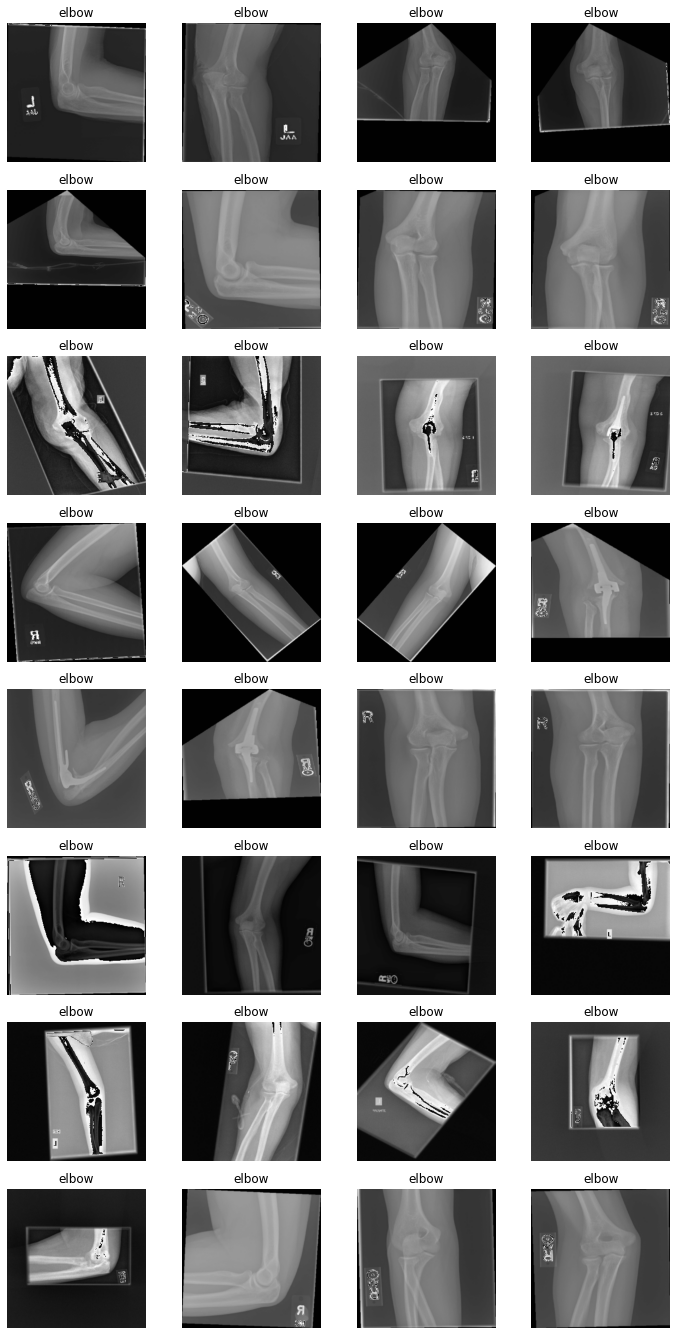

In [25]:
from torchvision.transforms.functional import to_pil_image
import matplotlib as mpl
import matplotlib.pyplot as plt

# Visualize some of the train samples of one batch
class_names = ["elbow", "finger", "forearm", "hand", "humerus", "shoulder", "wrist"]
# Rows and columns are set to fit one training batch (32)

n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        image, target = dataset_train[index]
        plt.imshow(to_pil_image(image))
        plt.axis('off')
        plt.title(class_names[target], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

plt.show()

### Train/Test Loops

In [26]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    global losses
    
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X = X.to(device)
        y = y.to(device)
        model = model.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 50 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            losses.append(loss)


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    global accuracy
    
    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)
            model = model.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    
    accuracy.append(correct*100)
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

## Classification Model
Pretrained DenseNet121

In [27]:
#from torchvision.models import resnet50, ResNet50_Weights
losses = []
epochs_list = []
accuracy = []

part_model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True).to(device)

# for param in part_model.parameters():
#     param.requires_grad = False
part_model.fc = nn.Linear(2048, 7)

optimizer = optim.Adam(part_model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

epochs = 15
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, part_model, loss_fn, optimizer)
    test_loop(val_loader, part_model, loss_fn)
    epochs_list.append(t+1)

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0
/home/wat6sv/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wat6sv/.local/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1
-------------------------------
loss: 8.948334  [   32/28759]
loss: 0.438478  [ 1632/28759]
loss: 0.301303  [ 3232/28759]
loss: 0.202675  [ 4832/28759]
loss: 0.247245  [ 6432/28759]
loss: 0.178146  [ 8032/28759]
loss: 0.057933  [ 9632/28759]
loss: 0.083858  [11232/28759]
loss: 0.068359  [12832/28759]
loss: 0.059085  [14432/28759]
loss: 0.069933  [16032/28759]
loss: 0.167404  [17632/28759]
loss: 0.087101  [19232/28759]
loss: 0.278044  [20832/28759]
loss: 0.170147  [22432/28759]
loss: 0.042322  [24032/28759]
loss: 0.033277  [25632/28759]
loss: 0.047981  [27232/28759]
Test Error: 
 Accuracy: 88.4%, Avg loss: 0.402043 

Epoch 2
-------------------------------
loss: 0.177705  [   32/28759]
loss: 0.188094  [ 1632/28759]
loss: 0.109071  [ 3232/28759]
loss: 0.044678  [ 4832/28759]
loss: 0.102137  [ 6432/28759]
loss: 0.048245  [ 8032/28759]
loss: 0.509728  [ 9632/28759]
loss: 0.229301  [11232/28759]
loss: 0.076666  [12832/28759]
loss: 0.102829  [14432/28759]
loss: 0.102924  [16032/28759

### Visualize

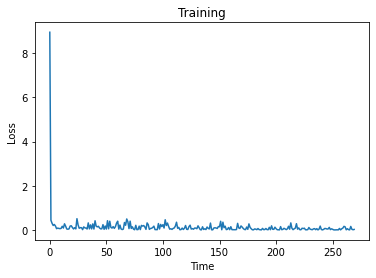

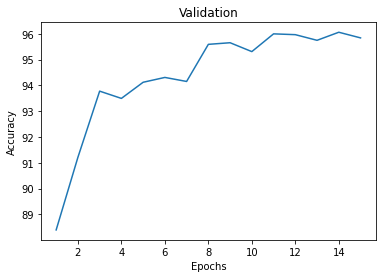

In [28]:
plt.plot(losses)
plt.xlabel("Time")
plt.ylabel("Loss")
plt.title("Training")
plt.show()

plt.plot(epochs_list, accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Validation")
plt.show()

## Body Part models

In [29]:
pwd

'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1'

### Sort out paths 

In [30]:
# cp -R MURA-v1.1 MURA-v1.1_2

In [31]:
os.chdir('/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1_2')

In [32]:
## Add abnormal & normal folders
## ONLY RUN ONCE ##

# for part in train_paths:
#     os.chdir(f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1_2/train/{part}')
#     os.mkdir('normal')
#     os.mkdir('abnormal')

# for part in train_paths:
#     os.chdir(f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1_2/valid/{part}')
#     os.mkdir('normal')
#     os.mkdir('abnormal')

# for part in train_paths:
#     os.chdir(f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1_2/test/{part}')
#     os.mkdir('normal')
#     os.mkdir('abnormal')

In [33]:
# move images into normal or abnormal folders for each body part

# import shutil

# normal_names = dataset_all[dataset_all['label']==0].path.to_list()
# normal_names += dataset_valid[dataset_valid['label']==0].path.to_list()

# folders = ['valid', 'train', 'test']

# for folder in folders:
#     for part in train_paths:
#         for root, dirs, files in os.walk(f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1_2/{folder}/{part}'):
#             for file in files:
#                 temp_dir = f'/gpfs/gpfs0/scratch/wat6sv/DL_Final/MURA-v1.1_2/{folder}/{part}/'
#                 if file in normal_names:
#                     try:
#                         temp = shutil.move(temp_dir + file, temp_dir+'normal')
#                     except:
#                         pass
#                 else:
#                     try:
#                         temp = shutil.move(temp_dir + file, temp_dir+'abnormal')
#                     except:
#                         pass

### Create dataloaders

In [34]:
## Create dictionary of image folders for each body part

part_train = {}

for part in train_paths:
    temp_file = ImageFolder(
    data_dir + f'_2/train/{part}',
    transform= transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
        ])
)
    part_train[part] = temp_file
    
    
part_test = {}

for part in train_paths:
    temp_file = ImageFolder(
    data_dir + f'_2/test/{part}',
    transform= transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
        ])
)
    part_test[part] = temp_file
    
part_val = {}

for part in train_paths:
    temp_file = ImageFolder(
    data_dir + f'_2/valid/{part}',
    transform= transforms.Compose([
        transforms.Resize((256,256)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
        ])
)
    part_val[part] = temp_file
        

In [35]:
for name in train_paths:
    print(f"--------------------{name}--------------------")
    
    print(f'After splitting the full dataset into train, val, and test:\n len(dataset_train){name}={len(part_train[name])}.\n len(dataset_val){name}={len(part_val[name])}.\n len(dataset_test){name}={len(part_test[name])}')

--------------------XR_HAND--------------------
After splitting the full dataset into train, val, and test:
 len(dataset_train)XR_HAND=4283.
 len(dataset_val)XR_HAND=460.
 len(dataset_test)XR_HAND=1281
--------------------XR_FINGER--------------------
After splitting the full dataset into train, val, and test:
 len(dataset_train)XR_FINGER=3950.
 len(dataset_val)XR_FINGER=461.
 len(dataset_test)XR_FINGER=1156
--------------------XR_SHOULDER--------------------
After splitting the full dataset into train, val, and test:
 len(dataset_train)XR_SHOULDER=6625.
 len(dataset_val)XR_SHOULDER=563.
 len(dataset_test)XR_SHOULDER=1853
--------------------XR_FOREARM--------------------
After splitting the full dataset into train, val, and test:
 len(dataset_train)XR_FOREARM=1417.
 len(dataset_val)XR_FOREARM=301.
 len(dataset_test)XR_FOREARM=408
--------------------XR_WRIST--------------------
After splitting the full dataset into train, val, and test:
 len(dataset_train)XR_WRIST=7700.
 len(dataset_v

In [36]:
#create dictionary of DataLoaders for each bodypart

part_train_loader = {}
part_test_loader = {}
part_val_loader = {}

for name in train_paths:
    part_train_loader[name] = DataLoader(part_train[name], batch_size=BATCH_SIZE, shuffle=True, num_workers=20)
    part_test_loader[name] = DataLoader(part_test[name], batch_size=BATCH_SIZE, shuffle=False, num_workers=20)
    part_val_loader[name] = DataLoader(part_val[name], batch_size=BATCH_SIZE, shuffle=True, num_workers=20)

### Visualize data

~~~~~~~~~~~~~~~~~~~~~XR_HAND~~~~~~~~~~~~~~~~~~~~~


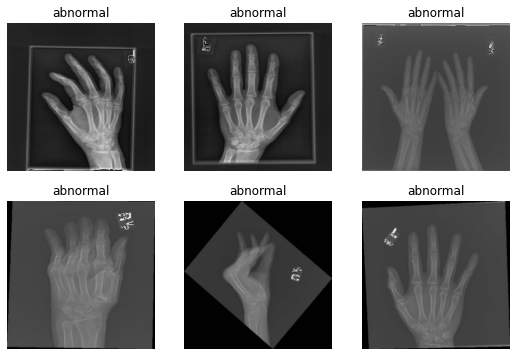

~~~~~~~~~~~~~~~~~~~~~XR_FINGER~~~~~~~~~~~~~~~~~~~~~


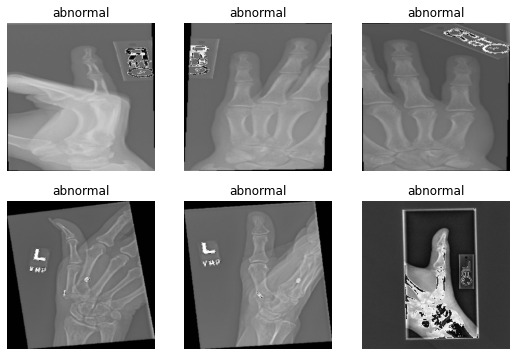

~~~~~~~~~~~~~~~~~~~~~XR_SHOULDER~~~~~~~~~~~~~~~~~~~~~


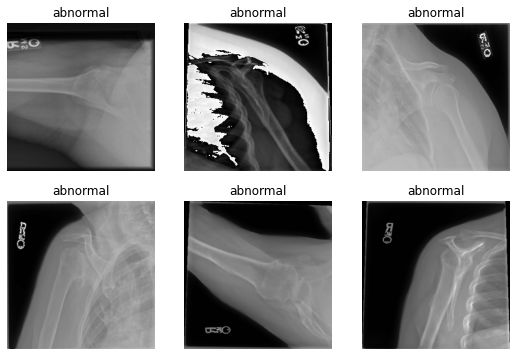

~~~~~~~~~~~~~~~~~~~~~XR_FOREARM~~~~~~~~~~~~~~~~~~~~~


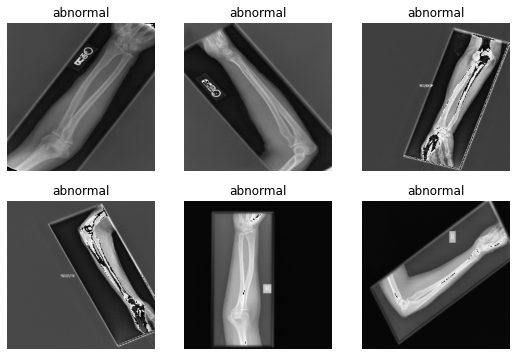

~~~~~~~~~~~~~~~~~~~~~XR_WRIST~~~~~~~~~~~~~~~~~~~~~


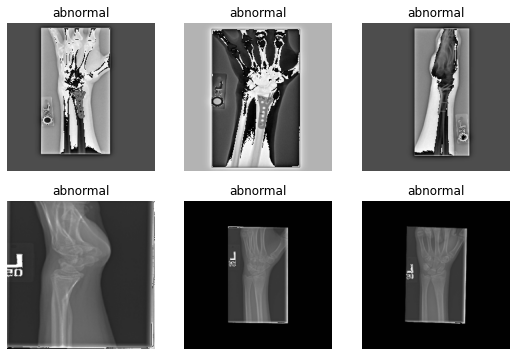

~~~~~~~~~~~~~~~~~~~~~XR_HUMERUS~~~~~~~~~~~~~~~~~~~~~


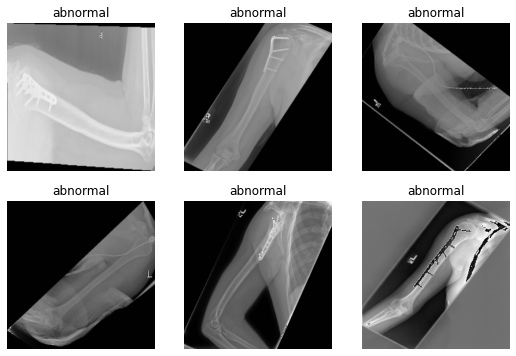

~~~~~~~~~~~~~~~~~~~~~XR_ELBOW~~~~~~~~~~~~~~~~~~~~~


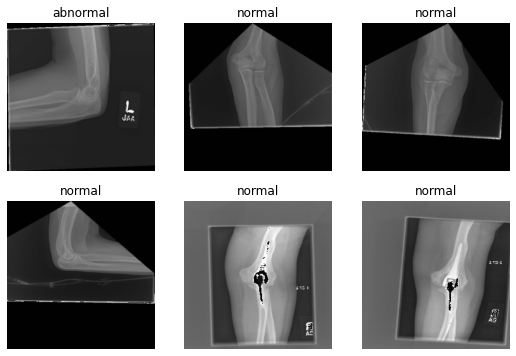

In [37]:
label_names = ['normal', 'abnormal']

for name in train_paths:
    n_rows = 2
    n_cols = 3
    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    print(f'~~~~~~~~~~~~~~~~~~~~~{name}~~~~~~~~~~~~~~~~~~~~~')
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col 
            plt.subplot(n_rows, n_cols, index + 1)
            image, target = part_train[name][index]
            target -= 1
            plt.imshow(to_pil_image(image))
            plt.axis('off')
            plt.title(label_names[target], fontsize=12)
    plt.subplots_adjust(wspace=.2, hspace=.2)

    plt.show()

### Train models
This will loop through all body parts in a list of body parts and train a model for each.

In [38]:
def train_body_models(part):
    '''
    run training and validation test for each model input
    '''

    model = torch.hub.load('pytorch/vision:v0.10.0', 'densenet121', pretrained=True).to(device)

    model.fc = nn.Linear(2048, 2) #bc binary

    optimizer = optim.Adam(model.parameters(), lr=0.001)
    loss_fn = nn.CrossEntropyLoss()

    epochs = 15
    print(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~{part}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for t in range(epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loop(part_train_loader[part], model, loss_fn, optimizer)
        test_loop(part_val_loader[part], model, loss_fn)
        epochs_list.append(t+1)
    return model

In [39]:
## Create a dictionary of body part models
model_dict = {}
for name in train_paths:
    model_dict[name] = train_body_models(name)

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_HAND~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.326652  [   32/ 4283]
loss: 0.610471  [ 1632/ 4283]
loss: 0.561359  [ 3232/ 4283]
Test Error: 
 Accuracy: 63.0%, Avg loss: 0.794556 

Epoch 2
-------------------------------
loss: 0.663764  [   32/ 4283]
loss: 0.522875  [ 1632/ 4283]
loss: 0.492549  [ 3232/ 4283]
Test Error: 
 Accuracy: 70.4%, Avg loss: 0.565069 

Epoch 3
-------------------------------
loss: 0.511122  [   32/ 4283]
loss: 0.554799  [ 1632/ 4283]
loss: 0.526307  [ 3232/ 4283]
Test Error: 
 Accuracy: 69.1%, Avg loss: 0.589840 

Epoch 4
-------------------------------
loss: 0.411983  [   32/ 4283]
loss: 0.601092  [ 1632/ 4283]
loss: 0.534334  [ 3232/ 4283]
Test Error: 
 Accuracy: 67.8%, Avg loss: 0.641877 

Epoch 5
-------------------------------
loss: 0.420825  [   32/ 4283]
loss: 0.454359  [ 1632/ 4283]
loss: 0.561732  [ 3232/ 4283]
Test Error: 
 Accuracy: 72.4%, Avg loss: 0.574340 

Epoch 6
----------------

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_FINGER~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.476754  [   32/ 3950]
loss: 0.562441  [ 1632/ 3950]
loss: 0.626083  [ 3232/ 3950]
Test Error: 
 Accuracy: 67.0%, Avg loss: 0.619508 

Epoch 2
-------------------------------
loss: 0.502433  [   32/ 3950]
loss: 0.495916  [ 1632/ 3950]
loss: 0.587005  [ 3232/ 3950]
Test Error: 
 Accuracy: 57.9%, Avg loss: 0.851013 

Epoch 3
-------------------------------
loss: 0.587853  [   32/ 3950]
loss: 0.369249  [ 1632/ 3950]
loss: 0.441866  [ 3232/ 3950]
Test Error: 
 Accuracy: 66.6%, Avg loss: 0.995456 

Epoch 4
-------------------------------
loss: 0.624520  [   32/ 3950]
loss: 0.592489  [ 1632/ 3950]
loss: 0.512290  [ 3232/ 3950]
Test Error: 
 Accuracy: 63.1%, Avg loss: 0.626580 

Epoch 5
-------------------------------
loss: 0.516067  [   32/ 3950]
loss: 0.546189  [ 1632/ 3950]
loss: 0.623209  [ 3232/ 3950]
Test Error: 
 Accuracy: 74.2%, Avg loss: 0.579847 

Epoch 6
--------------

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_SHOULDER~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.289939  [   32/ 6625]
loss: 0.570374  [ 1632/ 6625]
loss: 0.880405  [ 3232/ 6625]
loss: 0.639496  [ 4832/ 6625]
loss: 0.469965  [ 6432/ 6625]
Test Error: 
 Accuracy: 60.6%, Avg loss: 0.656804 

Epoch 2
-------------------------------
loss: 0.588852  [   32/ 6625]
loss: 0.577775  [ 1632/ 6625]
loss: 0.616836  [ 3232/ 6625]
loss: 0.524895  [ 4832/ 6625]
loss: 0.463369  [ 6432/ 6625]
Test Error: 
 Accuracy: 64.7%, Avg loss: 0.612612 

Epoch 3
-------------------------------
loss: 0.533742  [   32/ 6625]
loss: 0.532990  [ 1632/ 6625]
loss: 0.451802  [ 3232/ 6625]
loss: 0.557895  [ 4832/ 6625]
loss: 0.599927  [ 6432/ 6625]
Test Error: 
 Accuracy: 54.9%, Avg loss: 0.868932 

Epoch 4
-------------------------------
loss: 0.509847  [   32/ 6625]
loss: 0.612480  [ 1632/ 6625]
loss: 0.652288  [ 3232/ 6625]
loss: 0.624250  [ 4832/ 6625]
loss: 0.426697  [ 6432/ 6625]
Test Error: 
 

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_FOREARM~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.399474  [   32/ 1417]
Test Error: 
 Accuracy: 54.5%, Avg loss: 0.938115 

Epoch 2
-------------------------------
loss: 0.353990  [   32/ 1417]
Test Error: 
 Accuracy: 68.4%, Avg loss: 0.609915 

Epoch 3
-------------------------------
loss: 0.465066  [   32/ 1417]
Test Error: 
 Accuracy: 76.4%, Avg loss: 0.520015 

Epoch 4
-------------------------------
loss: 0.307263  [   32/ 1417]
Test Error: 
 Accuracy: 63.8%, Avg loss: 0.673644 

Epoch 5
-------------------------------
loss: 0.415040  [   32/ 1417]
Test Error: 
 Accuracy: 69.8%, Avg loss: 0.567932 

Epoch 6
-------------------------------
loss: 0.456613  [   32/ 1417]
Test Error: 
 Accuracy: 75.4%, Avg loss: 0.567140 

Epoch 7
-------------------------------
loss: 0.238608  [   32/ 1417]
Test Error: 
 Accuracy: 67.1%, Avg loss: 0.857741 

Epoch 8
-------------------------------
loss: 0.615196  [   32/ 1417]
Test Er

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_WRIST~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.557900  [   32/ 7700]
loss: 0.668692  [ 1632/ 7700]
loss: 0.631973  [ 3232/ 7700]
loss: 0.370894  [ 4832/ 7700]
loss: 0.511293  [ 6432/ 7700]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.447364 

Epoch 2
-------------------------------
loss: 0.383078  [   32/ 7700]
loss: 0.314069  [ 1632/ 7700]
loss: 0.243596  [ 3232/ 7700]
loss: 0.343499  [ 4832/ 7700]
loss: 0.392098  [ 6432/ 7700]
Test Error: 
 Accuracy: 71.9%, Avg loss: 0.556261 

Epoch 3
-------------------------------
loss: 0.460331  [   32/ 7700]
loss: 0.484881  [ 1632/ 7700]
loss: 0.338498  [ 3232/ 7700]
loss: 0.276090  [ 4832/ 7700]
loss: 0.866358  [ 6432/ 7700]
Test Error: 
 Accuracy: 81.3%, Avg loss: 0.436134 

Epoch 4
-------------------------------
loss: 0.544793  [   32/ 7700]
loss: 0.314872  [ 1632/ 7700]
loss: 0.326951  [ 3232/ 7700]
loss: 0.418652  [ 4832/ 7700]
loss: 0.320660  [ 6432/ 7700]
Test Error: 
 Acc

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_HUMERUS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.952964  [   32/  971]
Test Error: 
 Accuracy: 63.5%, Avg loss: 1.094516 

Epoch 2
-------------------------------
loss: 0.659099  [   32/  971]
Test Error: 
 Accuracy: 70.5%, Avg loss: 0.558388 

Epoch 3
-------------------------------
loss: 0.393460  [   32/  971]
Test Error: 
 Accuracy: 64.6%, Avg loss: 0.844190 

Epoch 4
-------------------------------
loss: 0.546745  [   32/  971]
Test Error: 
 Accuracy: 62.5%, Avg loss: 0.818117 

Epoch 5
-------------------------------
loss: 0.568773  [   32/  971]
Test Error: 
 Accuracy: 81.2%, Avg loss: 0.494304 

Epoch 6
-------------------------------
loss: 0.266819  [   32/  971]
Test Error: 
 Accuracy: 78.8%, Avg loss: 0.559887 

Epoch 7
-------------------------------
loss: 0.327226  [   32/  971]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.517232 

Epoch 8
-------------------------------
loss: 0.313503  [   32/  971]
Test Er

Using cache found in /home/wat6sv/.cache/torch/hub/pytorch_vision_v0.10.0


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~XR_ELBOW~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Epoch 1
-------------------------------
loss: 8.307562  [   32/ 3813]
loss: 0.618229  [ 1632/ 3813]
loss: 0.459998  [ 3232/ 3813]
Test Error: 
 Accuracy: 14.4%, Avg loss: 7.519985 

Epoch 2
-------------------------------
loss: 0.532622  [   32/ 3813]
loss: 0.572814  [ 1632/ 3813]
loss: 0.402328  [ 3232/ 3813]
Test Error: 
 Accuracy: 11.6%, Avg loss: 4.778525 

Epoch 3
-------------------------------
loss: 0.742574  [   32/ 3813]
loss: 0.628944  [ 1632/ 3813]
loss: 0.662193  [ 3232/ 3813]
Test Error: 
 Accuracy: 4.9%, Avg loss: 5.556618 

Epoch 4
-------------------------------
loss: 0.453853  [   32/ 3813]
loss: 0.373875  [ 1632/ 3813]
loss: 0.416722  [ 3232/ 3813]
Test Error: 
 Accuracy: 6.9%, Avg loss: 5.665854 

Epoch 5
-------------------------------
loss: 0.549186  [   32/ 3813]
loss: 0.198889  [ 1632/ 3813]
loss: 0.441239  [ 3232/ 3813]
Test Error: 
 Accuracy: 11.8%, Avg loss: 5.202248 

Epoch 6
-----------------

### Predict on New Data

In [40]:
preds_list = {}

def test_eval(dataloader, model, model_name):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    model.eval()
    
    part_preds = []
    
    with torch.no_grad():
        for batch, (X, y) in enumerate(dataloader):
            X = X.to(device)
            y = y.to(device)
            model = model.to(device)
            pred = model(X)
            part_preds.extend(pred.argmax(1).tolist())
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    preds_list[model_name] = part_preds

    correct /= size
    print(f"Accuracy on Test: {(100*correct):>0.1f}%, ")

In [42]:
part_names = list(part_train.keys())

In [44]:
part_model.eval()
test_eval(test_loader, part_model, part_model)

Accuracy on Test: 97.8%, 


In [46]:
model_names = ['XR_ELBOW', 'XR_FINGER', 'XR_FOREARM', 'XR_HAND', 'XR_HUMERUS', 'XR_SHOULDER', 'XR_WRIST']

In [47]:
for name in model_names:
    print(f"-------------{name}-------------")
    model = model_dict[name]
    loader = part_test_loader[name]
    model.eval()
    test_eval(loader, model, name)

-------------XR_ELBOW-------------
Accuracy on Test: 81.5%, 
-------------XR_FINGER-------------
Accuracy on Test: 76.6%, 
-------------XR_FOREARM-------------
Accuracy on Test: 72.1%, 
-------------XR_HAND-------------
Accuracy on Test: 79.9%, 
-------------XR_HUMERUS-------------
Accuracy on Test: 73.4%, 
-------------XR_SHOULDER-------------
Accuracy on Test: 76.6%, 
-------------XR_WRIST-------------
Accuracy on Test: 83.1%, 
